# Is Fandango Still Inflating Movie Ratings?

## Introduction:
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this <a href='https://fivethirtyeight.com/features/fandango-movies-ratings/'>article.</a>

Our goal here is to analyse recent movie ratings data to determine whether there has been any change in <a href= 'https://www.fandango.com/'>Fandango's</a> rating system after Hickey's analysis.


## Reading In Our Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fandango_score = pd.read_csv('fandango_score_comparison.csv')
mv_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

fandango_score.head()

In [3]:
mv_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
fandango_before = fandango_score.copy()[['FILM', 'Fandango_Stars', 
                'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [5]:
fandango_after = mv_ratings_16_17.copy()[['movie', 'year', 'fandango']]

Our goal is to find out whether there has been any changes to Fandango's rating system but the two samples of our data are nt representatie of our population. For the data collected by Walt Hickey `fandango_score_comparison.csv`, only popular movies with over 30+ ratings were included in the sample. And in our other sample `movie_ratings_16_17.csv`, the movies contained are movies between 2016 and 2017. 

These samples are not representative of our goal and so at this point, we have tw alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.
Tweaking our goal is a lot faster than having to collect new data. 

## New goal:
 Instead of comparing every movie rating to see if Fandango still inflates rating, we are going to compare the ratings of popular movies and see if Fandango is still inflating the rating of popular movies. What is considered a popular movie is very vague and so for the purpose of this analysis, we are going to use the same definition as Hickey's. Popular movies will be movies with 30 or more fan ratings. This should be a good proxy for our analysis.

In our second dataset `fandango_after`, there is no way to find out that a movie is a popular movie unlike our first dataset where every movie is a popular movie by Hickey's definition. One way to ensure that both samples are representative of our population of interest, we can take random samples from the `fandango_after` and then look them up. If 80% of our sample fits our definition of popular then we can be confident to work with our dataset.

In [6]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of 2022, all of the movies in our random sample had over 2500 fan ratings. Every movie in our random sample has well over 30 fan ratings and this to be expected as they were released at least 6 years ago. So to redefine a popular movie, I'm going to redefine them as movies with over 5000 fan ratings. With this neww definition, 80% of our random sample meets the criteria for a popular movie. Here is what the ratings look like.

|Movie|Fan ratings|
|:---:|:---------:|
|Mechanic: Resurrection|25000+|
|Warcraft|25000+|
|Max Steel|5000+|
|Me Before You|25000+|
|Fantastic Beasts and Where to Find Them|50000+|
|Cell|2500+|
|Genius|2500+|
|Sully|25000+|
|A Hologram for the King|10000+|
|Captain America: Civil War|100000+|


## Isolating The Year
Because we need our sample points to belong to our poulation of interest, we need to isolate only movies released in 2015 for our before dataset and 2016 for our after dataset.

In [7]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


We can see the movie release year is nested in the movie title(FILM column). We can extract each year from the title and use it to isolate the year we want.

In [8]:
fandango_before['year'] = fandango_before['FILM'].str[-5:-1].astype(int)
fandango_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

17 of the movies in our before dataset were released before 2015.

In [9]:
fandango_2015 = fandango_before.copy()[fandango_before['year']==2015]
fandango_2016 = fandango_after.copy()[fandango_after['year']==2016]

Now that we have isolated the data we need, we can carry on with our analysis. 

In [10]:
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

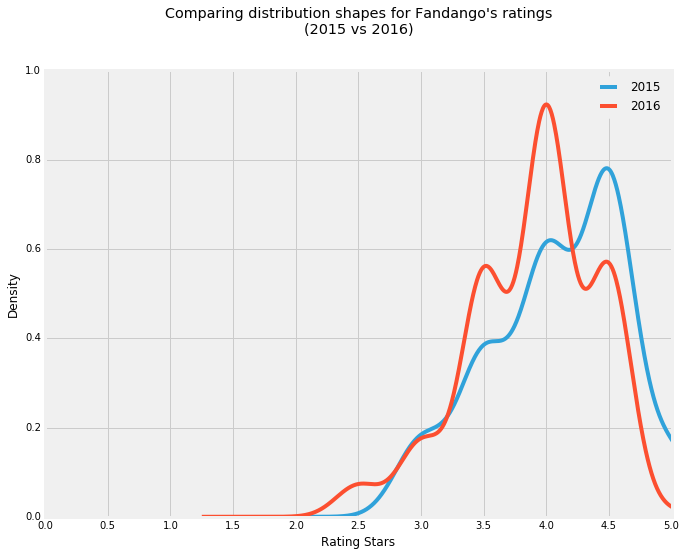

In [11]:
fandango_2015['Fandango_Stars'].plot.kde(label ='2015', legend=True,
                                         figsize=(10,8))
fandango_2016['fandango'].plot.kde(label= '2016', legend=True,)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, .5))
plt.xlabel('Rating Stars')
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.show()

Comparing the distribution shape of the two years. The first thing you notice is that the 2016 data starts at much lower star, which means that movies in 2016 received slightly lower ratings than the movies in 2015. Regardless, The distribution are still largely left skewed showing that movies on Fandango tend to receive high ratings.

Let's examine the frequency distribution of the stars in both tables.

## Comparing The Distribution Frequencies

In [12]:
print('Frequency 2015:')
print(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index())
print('\n')
print('Frequency 2016:')
print(fandango_2016['fandango'].value_counts(normalize = True).sort_index())


Frequency 2015:
3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64


Frequency 2016:
2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64


If we compare the relative frequencies for both the 2015 and 2016 data, we can see that there is a clear difference. For starters, the 2016 star ratings is less than that of 2015 and also the minimum rating for the 2016 data is 2.5 stars compared to the 3 stars on the 2015 data. While we have confirmed that there is a clear difference between the two distributions, the direction of the difference is not clear. 
We are going to take acouple of summary statistics to get a clear picture about the direction of the difference.  We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [13]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
median_2015 = fandango_2015['Fandango_Stars'].median()

mean_2016 = fandango_2016['fandango'].mean()
mode_2016 = fandango_2016['fandango'].mode()[0]
median_2016 = fandango_2016['fandango'].median()

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


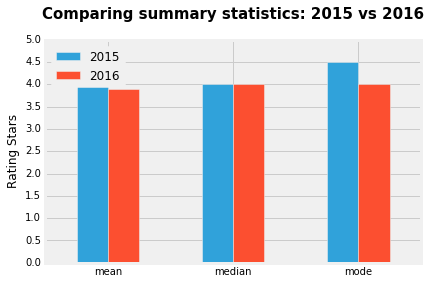

In [14]:
width = 0.5
plt.figure(figsize=(10, 6))
summary.plot.bar(rot=0)
plt.ylim(0, 5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Rating Stars')
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07,
         size=15, weight='bold')
plt.show()

While the median rating is the same for both the 2015 and 2016 movies. The mean rating for the 2016 data dropped by 0.2 while the modal rating dropped by 0.5

## Conclusion:
We have been able to establish that there is a clear difference in the ratings for the 2015 and 2016 fandango datasets. The 2016 ratings are slightly lower to than that of the 2015 ratings. This change could possibly be because the bug identfied in the fandango website after Hickey's analysis has been fixed and ratings are no longer rounder up.